# Applying various supervised ML algorithms using the provided dataset for predicting results and finding the best algorithm for the given dataset.

## Algorithms used:

1. Support Vector Machines
2. Logistic Regression
3. K Nearest Neighbour
4. Decision Tree
5. Naive Bayes
6. Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset = pd.read_csv("train_AV3.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
x = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

In [4]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [5]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [6]:
dataset.columns[dataset.isnull().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [7]:
for i in list(dataset.columns):
      dataset[i].fillna("0",inplace = True)

In [8]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [9]:
dataset["Dependents"].replace("3+","3", inplace=True)

In [10]:
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount            object
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
x_encoded = LabelEncoder()
columns = ["Gender","Married","Dependents","Education","Self_Employed",
          "LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Loan_Status"]
for i in columns:
    dataset[i] = x_encoded.fit_transform(list(dataset[i]))

In [12]:
dataset.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
dtype: object

In [13]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,1,0,0,1,5849,0.0,0,7,2,2,1
1,LP001003,2,2,1,0,1,4583,1508.0,29,7,2,0,0
2,LP001005,2,2,0,0,2,3000,0.0,175,7,2,2,1
3,LP001006,2,2,0,1,1,2583,2358.0,21,7,2,2,1
4,LP001008,2,1,0,0,1,6000,0.0,42,7,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,1,0,0,1,2900,0.0,179,7,2,0,1
610,LP002979,2,2,3,0,1,4106,0.0,145,3,2,0,1
611,LP002983,2,2,1,0,1,8072,240.0,112,7,2,2,1
612,LP002984,2,2,2,0,1,7583,0.0,81,7,2,2,1


In [14]:
x_new = dataset.drop(["Loan_ID", "Loan_Status"], axis=1)
y_new = dataset["Loan_Status"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 1)

In [16]:
accuracy = {}

In [17]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

# Support Vector Machine

In [18]:
svm = SVC(kernel= "linear", degree=2, verbose = True, random_state =1, gamma="auto")
svm.fit(x_train_sc, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=True)

In [19]:
y_predict_svm = svm.predict(x_test_sc)

In [20]:
confusion_matrix(y_test,y_predict_svm)

array([[18, 21],
       [ 5, 79]], dtype=int64)

In [21]:
accuracy_score(y_test, y_predict_svm)

0.7886178861788617

In [22]:
accuracy["SVM"]=accuracy_score(y_test, y_predict_svm)

# Logistic Regression

In [23]:
regressor = LogisticRegression(penalty="l1",multi_class="ovr",random_state = 1, solver="liblinear")
regressor.fit(x_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [24]:
y_predict_lr = regressor.predict(x_test_sc)

In [25]:
confusion_matrix(y_test, y_predict_lr)

array([[10, 29],
       [ 5, 79]], dtype=int64)

In [26]:
accuracy_score(y_test, y_predict_lr)

0.7235772357723578

In [27]:
accuracy["Logistic Regression"] = accuracy_score(y_test, y_predict_lr)

In [28]:
regressor.predict_proba(x_test_sc)

array([[0.74250073, 0.25749927],
       [0.69513438, 0.30486562],
       [0.28234812, 0.71765188],
       [0.2730483 , 0.7269517 ],
       [0.16318833, 0.83681167],
       [0.46804117, 0.53195883],
       [0.33757549, 0.66242451],
       [0.30328874, 0.69671126],
       [0.37716038, 0.62283962],
       [0.40971661, 0.59028339],
       [0.33849942, 0.66150058],
       [0.3940627 , 0.6059373 ],
       [0.27110456, 0.72889544],
       [0.28352157, 0.71647843],
       [0.27285681, 0.72714319],
       [0.2847928 , 0.7152072 ],
       [0.21660899, 0.78339101],
       [0.27870173, 0.72129827],
       [0.19511698, 0.80488302],
       [0.25924587, 0.74075413],
       [0.27134696, 0.72865304],
       [0.19780105, 0.80219895],
       [0.28285764, 0.71714236],
       [0.25317856, 0.74682144],
       [0.21988425, 0.78011575],
       [0.36508118, 0.63491882],
       [0.40846577, 0.59153423],
       [0.48699083, 0.51300917],
       [0.26168915, 0.73831085],
       [0.29893349, 0.70106651],
       [0.

# K Nearest Neighbor

In [29]:
cv = KFold(n_splits=20, shuffle=True, random_state=1)

In [30]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_new,dataset['Loan_Status'],cv=cv)
    accuracy_rate.append(score.mean())

In [31]:
accuracy_rate

[0.5506451612903225,
 0.4887096774193549,
 0.6041397849462364,
 0.5469354838709677,
 0.6283870967741936,
 0.5876881720430107,
 0.6431182795698923,
 0.6268817204301075,
 0.661021505376344,
 0.6284946236559138,
 0.6723118279569891,
 0.6527419354838708,
 0.6756989247311826,
 0.6579032258064514,
 0.6611290322580644,
 0.6563440860215053,
 0.6627956989247311,
 0.6708064516129031,
 0.6759139784946235,
 0.661021505376344,
 0.6758064516129031,
 0.6708064516129031,
 0.6742473118279568,
 0.6742473118279569,
 0.6759139784946236,
 0.6725806451612903,
 0.6806989247311827,
 0.6724731182795698,
 0.6808602150537635,
 0.6759139784946236,
 0.6791935483870968,
 0.6726881720430108,
 0.679247311827957,
 0.6726881720430108,
 0.6824193548387096,
 0.6791935483870967,
 0.6824193548387096,
 0.6791397849462364,
 0.6873118279569892]

In [32]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_new,dataset['Loan_Status'],cv=cv)
    error_rate.append(1-score.mean())

In [33]:
error_rate

[0.4493548387096775,
 0.5112903225806451,
 0.39586021505376356,
 0.4530645161290323,
 0.3716129032258064,
 0.4123118279569893,
 0.3568817204301077,
 0.3731182795698925,
 0.33897849462365603,
 0.3715053763440862,
 0.32768817204301093,
 0.3472580645161292,
 0.32430107526881735,
 0.34209677419354856,
 0.3388709677419356,
 0.3436559139784947,
 0.3372043010752689,
 0.3291935483870969,
 0.32408602150537646,
 0.33897849462365603,
 0.3241935483870969,
 0.3291935483870969,
 0.32575268817204317,
 0.32575268817204306,
 0.32408602150537635,
 0.32741935483870965,
 0.31930107526881735,
 0.3275268817204302,
 0.3191397849462365,
 0.32408602150537635,
 0.3208064516129032,
 0.3273118279569892,
 0.32075268817204305,
 0.3273118279569892,
 0.31758064516129036,
 0.32080645161290333,
 0.31758064516129036,
 0.3208602150537636,
 0.3126881720430108]

Text(0, 0.5, 'Error Rate')

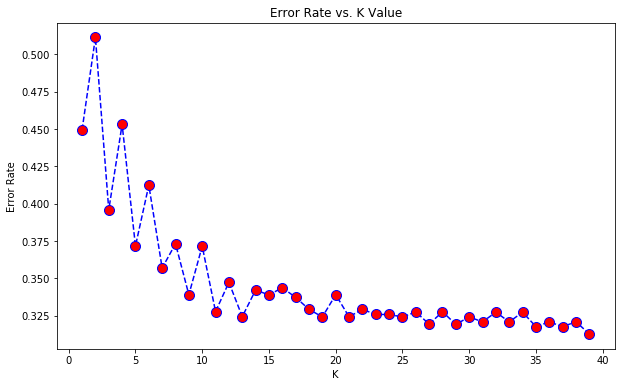

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(x_train_sc,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [36]:
y_predict_knn = knn_model.predict(x_test_sc)

In [37]:
confusion_matrix(y_test,y_predict_knn)

array([[14, 25],
       [ 3, 81]], dtype=int64)

In [38]:
accuracy_score(y_test,y_predict_knn)

0.7723577235772358

In [39]:
accuracy["KNN"] = accuracy_score(y_test, y_predict_knn)

# Decision Tree

In [40]:
for i in range(1,10):
    decisiontree = DecisionTreeClassifier(criterion = "entropy",random_state= 1, max_depth=i,splitter="random")
    decisiontree.fit(x_train_sc, y_train)
    y_predict_tree = decisiontree.predict(x_test_sc)
    print(accuracy_score(y_test,y_predict_tree),"max_depth=",i)

0.7886178861788617 max_depth= 1
0.8048780487804879 max_depth= 2
0.8130081300813008 max_depth= 3
0.8130081300813008 max_depth= 4
0.7723577235772358 max_depth= 5
0.7967479674796748 max_depth= 6
0.7886178861788617 max_depth= 7
0.8048780487804879 max_depth= 8
0.7073170731707317 max_depth= 9


In [41]:
decisiontree = DecisionTreeClassifier(criterion = "entropy", random_state= 1,max_depth=4,splitter="random")
decisiontree.fit(x_train_sc, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='random')

In [42]:
y_predict_tree = decisiontree.predict(x_test_sc)

In [43]:
accuracy_score(y_test,y_predict_tree)

0.8130081300813008

In [44]:
accuracy["Decision Tree"] = accuracy_score(y_test, y_predict_tree)

In [45]:
confusion_matrix(y_test, y_predict_tree)

array([[17, 22],
       [ 1, 83]], dtype=int64)

# Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [47]:
gnb.fit(x_train_sc, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
y_pred_nb = gnb.predict(x_test_sc)

In [49]:
confusion_matrix(y_test, y_pred_nb)

array([[10, 29],
       [ 8, 76]], dtype=int64)

In [50]:
accuracy_score(y_test, y_pred_nb)

0.6991869918699187

In [51]:
accuracy["Naive Bayes"] = accuracy_score(y_test, y_pred_nb)

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
for i in range(1,40):
    rand_forest_model = RandomForestClassifier(criterion = "entropy",n_estimators = i, random_state=1, max_depth=3)
    rand_forest_model.fit(x_train_sc, y_train)
    y_pred_rf = rand_forest_model.predict(x_test_sc)
    print(accuracy_score(y_test, y_pred_rf),"n_estimators=",i)

0.6422764227642277 n_estimators= 1
0.6666666666666666 n_estimators= 2
0.8211382113821138 n_estimators= 3
0.8048780487804879 n_estimators= 4
0.7723577235772358 n_estimators= 5
0.7886178861788617 n_estimators= 6
0.7723577235772358 n_estimators= 7
0.7560975609756098 n_estimators= 8
0.7804878048780488 n_estimators= 9
0.7804878048780488 n_estimators= 10
0.7723577235772358 n_estimators= 11
0.7804878048780488 n_estimators= 12
0.7886178861788617 n_estimators= 13
0.7886178861788617 n_estimators= 14
0.7804878048780488 n_estimators= 15
0.7804878048780488 n_estimators= 16
0.7642276422764228 n_estimators= 17
0.7804878048780488 n_estimators= 18
0.7723577235772358 n_estimators= 19
0.7723577235772358 n_estimators= 20
0.7642276422764228 n_estimators= 21
0.7642276422764228 n_estimators= 22
0.7560975609756098 n_estimators= 23
0.7479674796747967 n_estimators= 24
0.7723577235772358 n_estimators= 25
0.7560975609756098 n_estimators= 26
0.7317073170731707 n_estimators= 27
0.7723577235772358 n_estimators= 28
0

In [54]:
rand_forest_model = RandomForestClassifier(criterion = "entropy",n_estimators = 3, random_state=1, max_depth=3)
rand_forest_model.fit(x_train_sc, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [55]:
y_pred_rf = rand_forest_model.predict(x_test_sc)

In [56]:
confusion_matrix(y_test, y_pred_rf)

array([[19, 20],
       [ 2, 82]], dtype=int64)

In [57]:
accuracy_score(y_test, y_pred_rf)

0.8211382113821138

In [58]:
accuracy["RandomForest"] = accuracy_score(y_test, y_pred_rf)

# Checking the best model for this dataset

In [59]:
accuracy

{'SVM': 0.7886178861788617,
 'Logistic Regression': 0.7235772357723578,
 'KNN': 0.7723577235772358,
 'Decision Tree': 0.8130081300813008,
 'Naive Bayes': 0.6991869918699187,
 'RandomForest': 0.8211382113821138}

In [60]:
max(accuracy, key = accuracy.get)

'RandomForest'

In [61]:
min(accuracy, key = accuracy.get)

'Naive Bayes'

# Analysis

Since the accuracy of Logistic Regression is maximum and SVM is minimum, they are respectively the best and worst model.